## IBM Data Science Professional Specialization - Coursera

<p>This notebook is for the capstone project for the 9-courses specialization in Data Science of IBM. Platform Coursera. Data Science Specialization
This project will try to solve a problem or question by applying data science methods on the location data gotten from FourSquare API.</p>


## Renting in Los Angeles
#### Paul Tran
<li>Email: ptran4@my.hpu.edu</li>

#### I. Introduction/ Bussiness problem 

<p>Los Angeles, the largest city of California, and one of the most populous city in the U.S. With its perfect Mediterranean climates, it  is home of approximate 4 million people (1). The city also has many well known Universities such as UCLA, USC,  and CalTech. Each year, hundreds thousands of people come to this city for good. Many of them are students, fresh graduated, working class, contractors, or  even tourists.  Therefore the demands for finding a place to settle down is  essential.</p>

<p>The idea of comes from a process of a person try to figure out a place to rent after moving from an other city or even from a different country. It is common that people will looking for places that have reasonable prices and located closed by some kinds of venues such as restaurants, coffee show, and markets, ect. Therefore, what types of surrounding venues will affects the rent prices positively and negatively?</p>

<p>For this project, the main goal will be exploring the neighborhood of Los Angeles County in order to find out the correlation between the Counties’s  surrounding venues and the rents prices of it’s neighborhood. The project will target: 
<li>Students who attend at any Universities in Los Angeles county.
<li>Tenants who try to find a new place to rent. 
<li>Business looking for a place to rent 
<li>Tourist 
<li>Renting agents or landlords  who want to optimize their  renting advertisement
<li>And last but not lease. to this class’s instructions and classmate who will grade this project.

#### II. Data Overview:
<p>The data that being use in this  project will available at "maps.latimes.com". Those datas  provide the population density (measures the numbers of people per square mile) of each neighborhoods in Los Angeles. This dataset also be used to get the latitude and longitude of each neighborhood by using geocoder.arcgis library. Moreover, it  also being	 used to  visualize LA population's distribution, therefore audiences will have a broad idea of each locations.</p> 

<p> In a addition, there were a data set from "https://usc.data.socrata.com/" where it contains the median value of gross rent prices in an area, measured in dollars of from  the year of 2010 to 2016.  This median rent price measures the gross rent of that area, meaning that, it will include all the utility such as electricity, water, gas and sewage.</p>

<p>The geojson  file of Los Angeles communities uses to indicate neighborhood boundaries on the map taken from“https://boundaries.latimes.com/" . Surrounding venues for each city in LA county was searched using FourSquare API base on the latitude and longitude of each city gathered using geocoder.arcgis library from the "maps.latimes.com" dataset that being mentioned above. This data later will be used to compare, analyze and cluster.</p>

In [242]:
# Needed library
import pandas as pd   
from pandas.io.json import json_normalize
import numpy as np
import json
from geopy.geocoders import Nominatim
import requests


import folium
import geocoder

# Matplotlib and associated plotting modules
%matplotlib inline
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt



from sklearn.preprocessing import StandardScaler, normalize, scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from IPython.display import IFrame # to display html map

from scipy import stats

In [3]:
#### Scraping the data table from 
la = pd.read_html("https://maps.latimes.com/neighborhoods/population/density/neighborhood/list/")
la_df = pd.DataFrame(la[1])
#la_df.rename(columns={'Name: Neighborhoods'})
#la_df= la_df.rename(columns={"Name": "Neighborhoods"})
la_df.head()



Rank    Neighborhood  Population per Sqmi
0     1       Koreatown                42611
1     2        Westlake                38214
2     3  East Hollywood                31095
3     4      Pico-Union                25352
4     5         Maywood                23638

In [5]:
#Using geocoder.arcgis to find out cities' latitude and longitude
latitude=[]
longitude=[]
for i in la_df["Neighborhood"].values:
    g = geocoder.arcgis('{}, Los Angeles, CA'.format(i))
    lat_lng_coords = g.latlng
    latitude.append(lat_lng_coords[0])
    longitude.append(lat_lng_coords[1])

# Creating columns Latitude and longitude
la_df["Latitude"]= latitude  
la_df["Longitude"]=longitude

la_df # display the table
# Cleaning the table, by droping "Rank" and  sorts values by "Neiborhood"
la_df= la_df.sort_values("Neighborhood")
la_df= la_df.drop("Rank",1).reset_index(drop= False)

la_df=la_df.drop("index",1)
# Save table as csv file.
la_df.to_csv("data1.csv") 

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


TypeError: 'NoneType' object is not subscriptable

In [7]:
la_df = pd.read_csv("data1.csv")
la_df= la_df.drop("Unnamed: 0",1)
la_df

Neighborhood  Population per Sqmi   Latitude   Longitude
0                       Acton                  166  34.468150 -118.195130
1             Adams-Normandie                21848  34.078090 -118.301200
2                Agoura Hills                 2495  34.146110 -118.778120
3                  Agua Dulce                   99  34.495700 -118.326210
4                    Alhambra                11275  34.093700 -118.127270
5                Alondra Park                 7548  33.889300 -118.330610
6                    Altadena                 4900  34.185560 -118.131520
7               Angeles Crest                    3  34.311589 -118.011132
8                     Arcadia                 4749  34.136350 -118.038670
9                      Arleta                10034  34.249050 -118.433490
10          Arlington Heights                21423  34.039890 -118.325420
11                    Artesia                10036  33.861140 -118.079680
12                     Athens                 6829  33.930980 -118.292070
13            Atwater Village                 8379  34.119700 -118.258870
14                     Avalon                 1159  33.344110 -118.321390
15            Avocado Heights                 5907  34.035970 -117.990580
16                      Azusa                 4496  34.133610 -117.905890
17     Baldwin Hills/Crenshaw                10446  34.010430 -118.336660
18               Baldwin Park                11176  34.085360 -117.960350
19                    Bel-Air                 1207  34.083610 -118.434830
20                       Bell                14357  33.979770 -118.188850
21               Bell Gardens                17762  33.969980 -118.149020
22                 Bellflower                11756  33.883260 -118.122290
23              Beverly Crest                 1318  34.096533 -118.403295
24              Beverly Grove                12990  34.095448 -118.426087
25              Beverly Hills                 5933  34.073460 -118.400320
26                Beverlywood                 7654  34.051380 -118.401330
27              Boyle Heights                14229  34.040040 -118.210500
28                   Bradbury                  658  34.145310 -117.970940
29                  Brentwood                 2059  34.066260 -118.470330
..                        ...                  ...        ...         ...
235             Vermont Vista                14154  34.092413 -118.291005
236           Vermont-Slauson                18577  33.989186 -118.237111
237                    Vernon                   18  34.005130 -118.230250
238   Veterans Administration                  683  33.941879 -118.422310
239   View Park-Windsor Hills                 6008  33.995510 -118.348350
240                   Vincent                10163  34.107050 -117.917180
241                    Walnut                 3329  34.026930 -117.840500
242               Walnut Park                22028  33.969480 -118.220290
243                     Watts                17346  33.941280 -118.239030
244                West Adams                14686  34.027980 -118.353140
245               West Carson                 9219  33.822210 -118.290330
246              West Compton                 3291  33.893170 -118.267390
247               West Covina                 6509  34.072140 -117.938070
248                West Hills                 4551  34.200360 -118.629330
249            West Hollywood                18924  34.090690 -118.370530
250          West Los Angeles                12061  34.046470 -118.433950
251        West Puente Valley                12855  34.043700 -117.958190
252            West San Dimas                  937  34.165203 -117.768563
253  West Whittier-Los Nietos                 9899  33.976000 -118.069090
254               Westchester                 3839  33.959730 -118.413690
255                  Westlake                38214  34.053710 -118.271300
256          Westlake Village                 1534  34.149870 -118.818750
257                  

In [8]:
#Use geopy library to get the latitude and longitude values of LA County.
address = "Los Angeles, CA"
geolocator = Nominatim(user_agent="la_explorer")
locat = geolocator.geocode(address)

lat = locat.latitude
lon = locat.longitude
print(lat,lon)

34.0536909 -118.2427666


#### Create a map of LA with neighborhoods superimposed on top

In [9]:
from folium import plugins
la_geo = r'la.json'

threshold_scale = np.linspace(la_df['Population per Sqmi'].min(),
                              la_df['Population per Sqmi'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


la_map = folium.Map(location=[lat,lon],zoom_start=10,tiles='Mapbox Bright')

la_map.choropleth(
    geo_data=la_geo,
    data=la_df,
    columns=['Neighborhood', 'Population per Sqmi'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='LA populaion',
    #reset=True
)

#la_map

#incidents = plugins.MarkerCluster().add_to(dalat_map)
for la,lo,name in zip(la_df['Latitude'],la_df['Longitude'],
                          la_df['Neighborhood']):
    label= "{}".format(name)
    label=folium.Popup(label)
    folium.CircleMarker(
        [la,lo],
        radius=2,
        color="blue",popup=label, fill=True,fill_cofill_color = "#3186cc",
        fill_opacity=0.7,
        parse_html=False).add_to(la_map)
    
la_map




/Users/PaulTran/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


<li> As an result, we can clearly see that the LA's population density is unbalance. The largest population'density is located in Mid-west of the County where Koreatown, Westlake, and East Hollywood are the top 3. 
<li> Large population towards the South of County
<li> North and and East are sparse.

In [10]:
#Read a table from usc.data.
#The table have already dowloaded.
rent = pd.read_csv("Rent_Price__LA_ (1).csv")
rent_price = rent[["Neighborhood","Amount"]]
rent_price= rent_price.sort_values(["Neighborhood"])
rent_price

Neighborhood  Amount
4867             Acton  1796.0
8589             Acton  1574.0
16315            Acton     NaN
6371             Acton  1884.0
8947             Acton  1671.0
12311            Acton  1125.0
3088             Acton  1420.0
13875            Acton     NaN
16336            Acton  1500.0
11528            Acton  1633.0
12108            Acton  1176.0
3839             Acton  2000.0
3383             Acton  2000.0
6096             Acton  1991.0
15592  Adams-Normandie  1050.0
197    Adams-Normandie   711.0
3326   Adams-Normandie   757.0
590    Adams-Normandie   876.0
3751   Adams-Normandie   930.0
11362  Adams-Normandie  1045.0
6474   Adams-Normandie   949.0
4443   Adams-Normandie   890.0
13289  Adams-Normandie   860.0
5423   Adams-Normandie   965.0
6015   Adams-Normandie   948.0
14377  Adams-Normandie   965.0
14077  Adams-Normandie   986.0
15760  Adams-Normandie   928.0
4737   Adams-Normandie   934.0
7413   Adams-Normandie   979.0
...                ...     ...
2578    Woodland Hills  2000.0
2580    Woodland Hills  2000.0
2603    Woodland Hills  2000.0
2619    Woodland Hills  1777.0
997     Woodland Hills     NaN
2708    Woodland Hills     NaN
10014   Woodland Hills  1952.0
2789    Woodland Hills  2000.0
2844    Woodland Hills  1861.0
2890    Woodland Hills     NaN
169     Woodland Hills  2000.0
2963    Woodland Hills  1836.0
10398   Woodland Hills  2034.0
9614    Woodland Hills  1681.0
15181   Woodland Hills  1575.0
15161   Woodland Hills  1874.0
15156   Woodland Hills  1939.0
3098    Woodland Hills  2000.0
3188    Woodland Hills     NaN
3235    Woodland Hills  2000.0
3293    Woodland Hills  2000.0
3382    Woodland Hills  2000.0
3402    Woodland Hills  2000.0
8944    Woodland Hills  2000.0
3419    Woodland Hills  2000.0
8800    Woodland Hills  1819.0
3543    Woodland Hills  2000.0
3568    Woodland Hills  1965.0
2986    Woodland Hills  2000.0
15135   Woodland Hills  3204.0

[16390 rows x 2 columns]

######  This table contain the renting prices  from 2010 to 2016 of each city in LA County. For the main purpose of  this project, I will use the average renting price for each neighborhood.

In [11]:
# Taking the average rent prict from each Neiborhood.
rent_price= rent_price.groupby(["Neighborhood"]).mean()
rent_price.reset_index(drop=False,inplace= True)
rent_price


Neighborhood       Amount
0                       Acton  1647.500000
1             Adams-Normandie   920.742857
2                Agoura Hills  2052.500000
3                  Agua Dulce  1130.200000
4                    Alhambra  1205.564286
5                Alondra Park  1667.142857
6                    Altadena  1458.321429
7               Angeles Crest  1194.428571
8                     Arcadia  1375.324675
9                      Arleta  1550.452381
10          Arlington Heights   993.785714
11                    Artesia  1400.333333
12                     Athens   953.571429
13            Atwater Village  1258.809524
14                     Avalon  1263.000000
15            Avocado Heights  1369.428571
16                      Azusa  1255.842857
17     Baldwin Hills/Crenshaw  1000.102041
18               Baldwin Park  1208.000000
19                    Bel-Air  1885.285714
20                       Bell  1002.346939
21               Bell Gardens  1085.761905
22                 Bellflower  1178.880952
23              Beverly Crest  1845.950000
24              Beverly Grove  1667.625000
25              Beverly Hills  1938.816327
26                Beverlywood  2316.142857
27              Boyle Heights   947.628571
28                   Bradbury  2166.428571
29                  Brentwood  1949.714286
..                        ...          ...
232             Vermont Vista   986.523810
233           Vermont-Slauson   974.482143
234                    Vernon   818.000000
235   Veterans Administration  1401.000000
236   View Park-Windsor Hills  1253.714286
237                   Vincent  1374.714286
238                    Walnut  2038.026316
239               Walnut Park   982.642857
240                     Watts   928.446429
241                West Adams  1013.523810
242               West Carson  1251.178571
243              West Compton  1000.142857
244               West Covina  1468.093168
245                West Hills  2049.068493
246            West Hollywood  1353.816327
247          West Los Angeles  1773.607143
248        West Puente Valley  1288.600000
249  West Whittier-Los Nietos  1301.309524
250               Westchester  1682.311688
251                  Westlake   904.985714
252          Westlake Village  2147.357143
253                  Westmont  1007.387755
254                  Westwood  1836.761905
255                  Whittier  1313.341270
256          Whittier Narrows  1293.142857
257               Willowbrook  1050.285714
258                Wilmington  1020.897196
259            Windsor Square  1307.285714
260                  Winnetka  1197.922078
261            Woodland Hills  1982.222222

[262 rows x 2 columns]

In [12]:
# Round the price to 2 decimal point.
rent_price["Amount"]= rent_price["Amount"].round(2)
rent_price.head()


Neighborhood   Amount
0            Acton  1647.50
1  Adams-Normandie   920.74
2     Agoura Hills  2052.50
3       Agua Dulce  1130.20
4         Alhambra  1205.56

In [13]:
#save the dataframe to csv file.
rent_price.to_csv("data2.csv")

#### Merge 2 tables together  

In [14]:
la_df_merge=rent_price.merge(la_df,on="Neighborhood")
print(la_df_merge.shape)
la_df_merge.head()


(255, 5)


Neighborhood   Amount  Population per Sqmi  Latitude  Longitude
0            Acton  1647.50                  166  34.46815 -118.19513
1  Adams-Normandie   920.74                21848  34.07809 -118.30120
2     Agoura Hills  2052.50                 2495  34.14611 -118.77812
3       Agua Dulce  1130.20                   99  34.49570 -118.32621
4         Alhambra  1205.56                11275  34.09370 -118.12727

In [15]:
#Save the dataframe to  data frame.
la_df_merge.to_csv("data3.csv")

To explore the characteristics of the data, a box plot and a simple descriptive statistics table were used. The box plot shows the disparities in renting price across all the communities in LA County. The red line represents the average price for the whole County, which is 1383.74  As shown in the box plot, there is a huge gap between the community with the highest rent price, San Marino with 2332.28, and the community with the lowest rent, Harvard Park with 709.43.

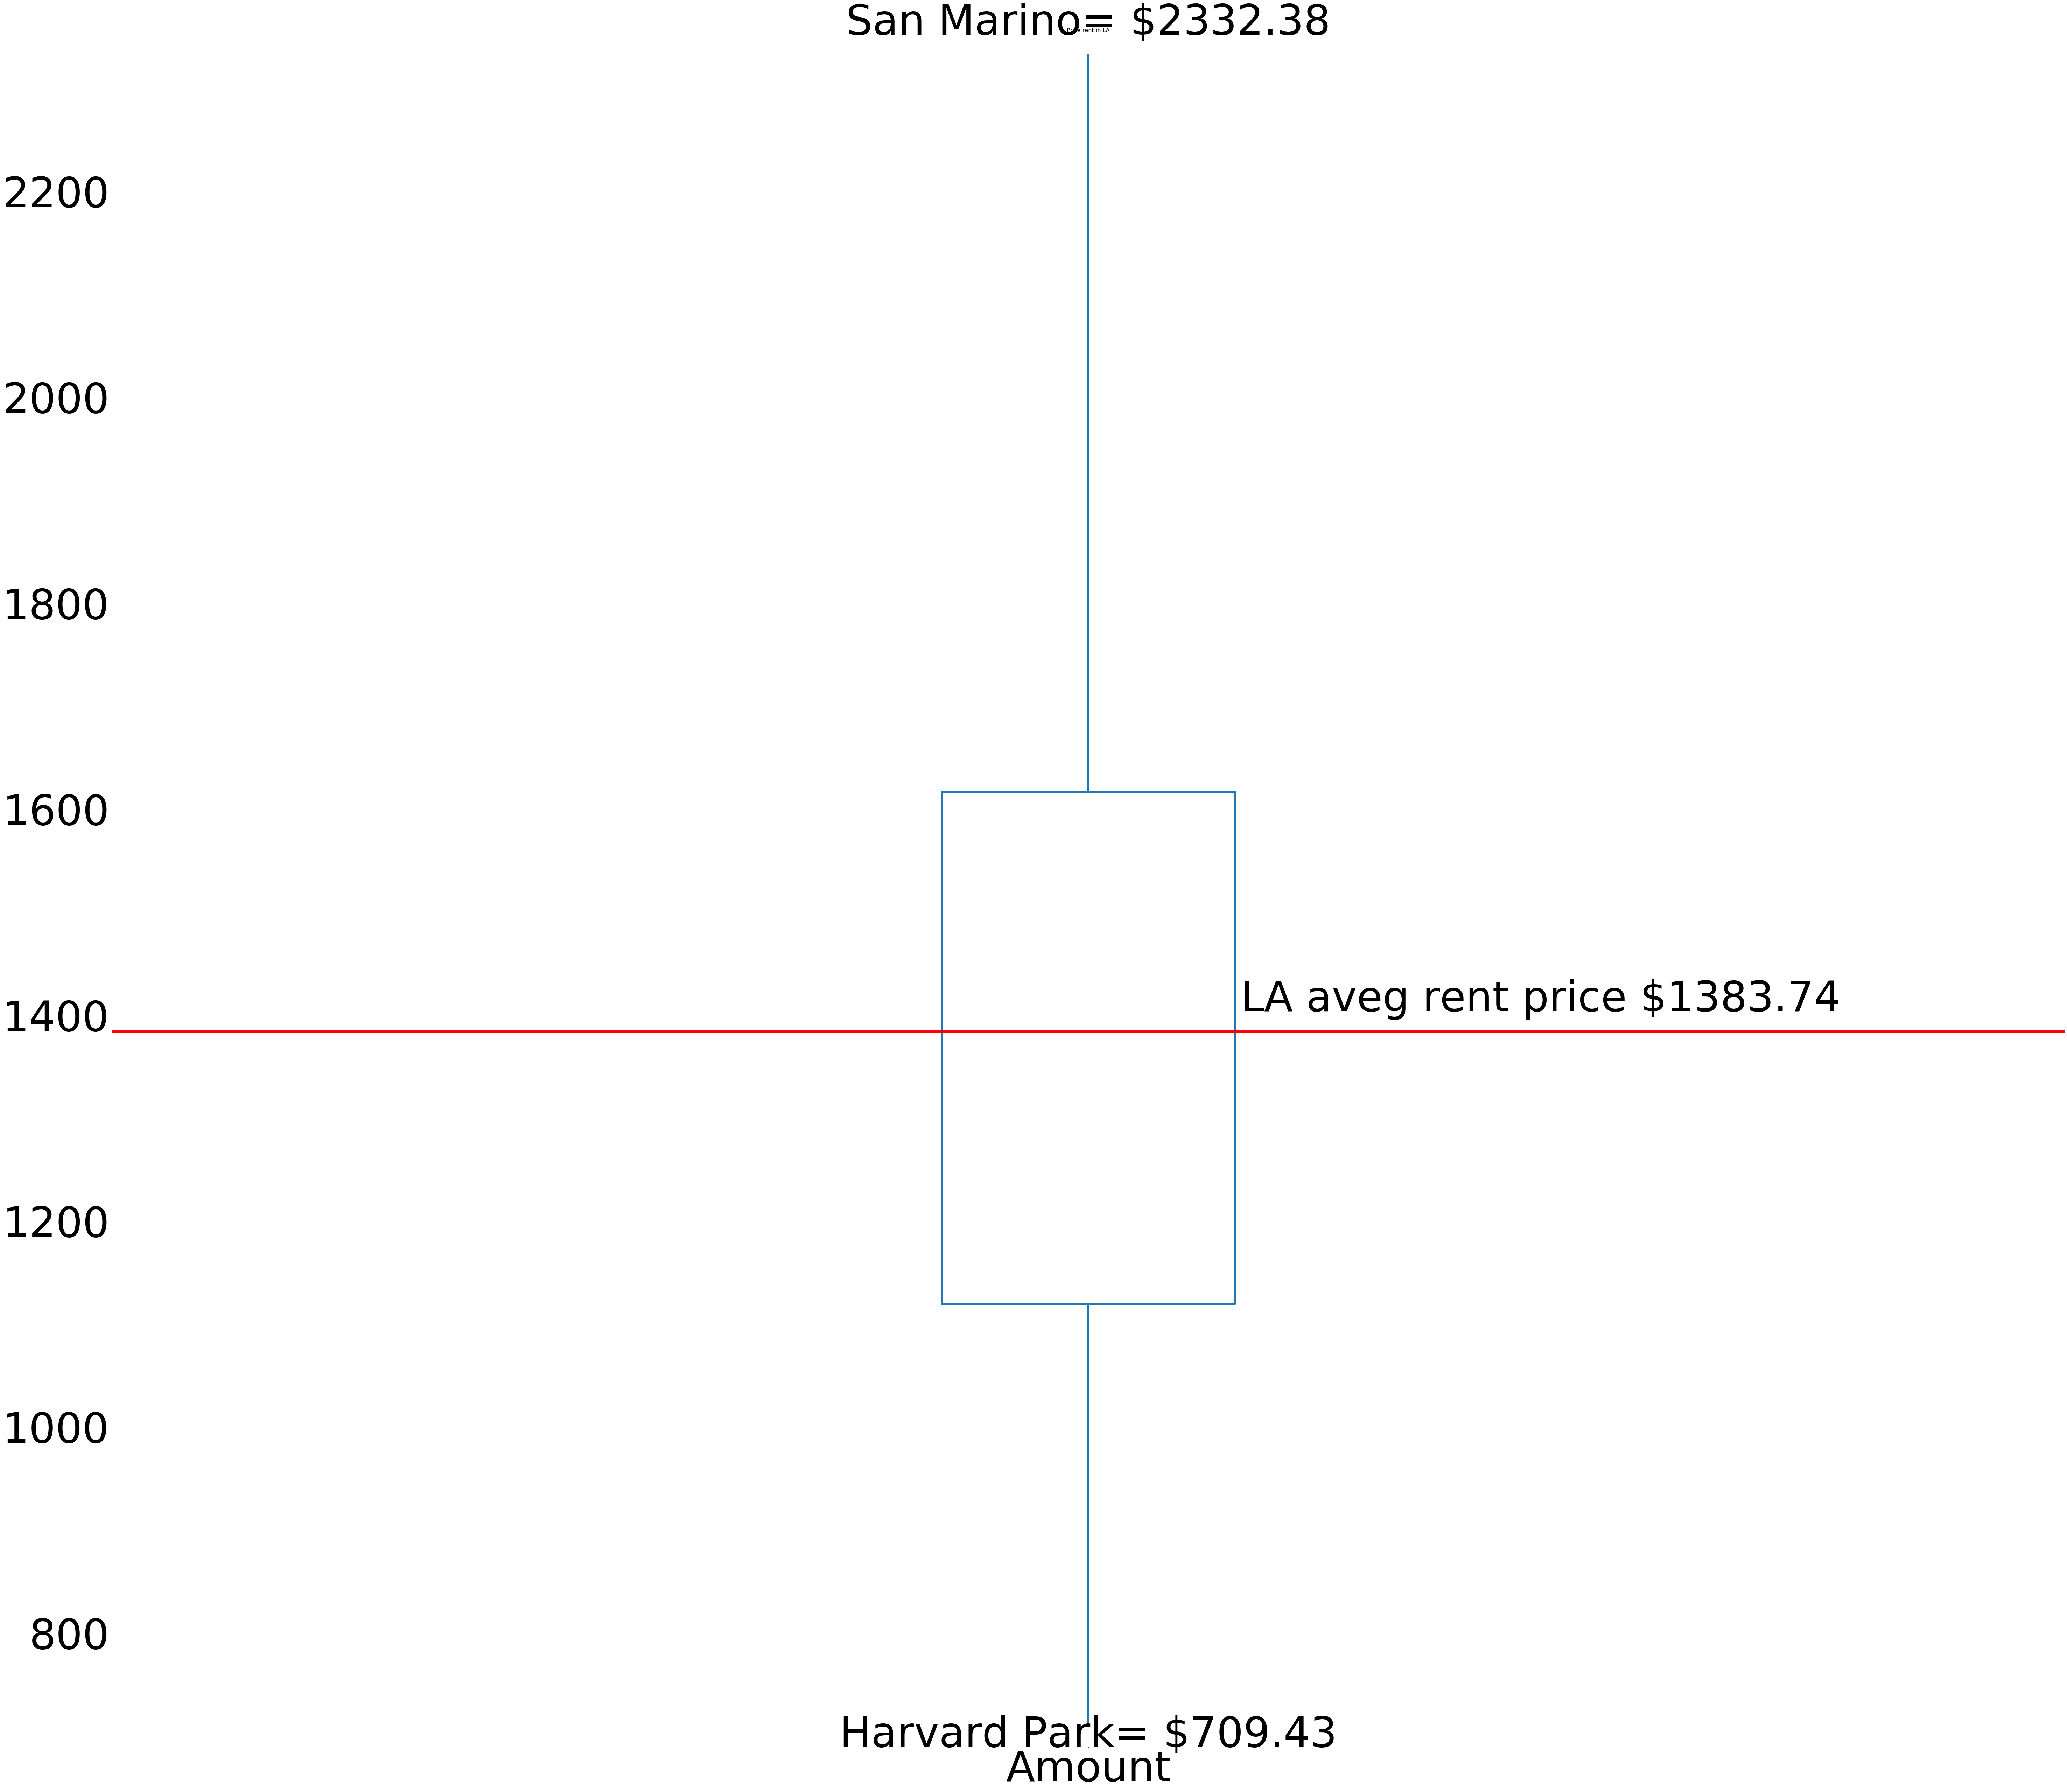

In [247]:
la_box = la_df_merge[["Neighborhood","Amount"]]
ave_la=  round(la_box['Amount'].mean(),2)

# Box plot of life expectancy of communitities
boxprops = dict(linewidth=6.0, color='black')
whiskerprops = dict(linestyle='-',linewidth=6.0, color='black')
la_box.plot(kind='box', figsize=(100, 90), fontsize=120, boxprops=boxprops, whiskerprops=whiskerprops)


#Add a line representing life expectancy for the whole city
plt.axhline(ave_la, color='r',linewidth=6.0)
text = "LA aveg rent price $" + str(ave_la) 
plt.annotate(text, xy=(1.078, ave_la + 20), fontsize=120)

# Get the higest and lowest life expectancies and the difference
max_la=  max(la_box['Amount'])
min_la = min(la_box['Amount'])
diff_la = max_la - min_la

# Get the communities with the highest and lowest rent
max_comm = la_box['Neighborhood'][la_box['Amount']==max_la].reset_index(drop=True)
min_comm = la_box['Neighborhood'][la_box['Amount']==min_la].reset_index(drop=True)

# Set title and y limit
plt.title("Price rent in LA", fontsize=16)
plt.ylim(min_la - 20, max_la + 20)

# Annotate the box plot with communities with the highest and lowest rent.
max_text = max_comm[0] + "= $" + str(max_la)
min_text = min_comm[0] + "= $" + str(min_la)

plt.annotate(max_text, xy=(1, max_la + 20), ha='center', fontsize=120)
plt.annotate(min_text, xy=(1, min_la - 20), ha='center', fontsize=120)

plt.savefig('box.png')
plt.show()

Once again, the Folium map will be a perfect for the data visualization. In the map below,the choropleth color scheme clearly show the renting prices of each neighborhood. Red areas represents high renting price. The more red the neighborhood is, the more expensive.
<li> West coastal area is clearly stands out with the high rent price.  

Bubbles with different size represent for the population density. The bigger the circle, the more crowed.
<li> One interesting observation is that, areas with high population density do not have high rent. And the area with less people living are having higher rent.



In [19]:
la_rent = folium.Map(location=[lat,lon],zoom_start=9,tiles='Mapbox Bright')

la_rent.choropleth(
    geo_data=la_geo,
    data=la_df_merge,
    columns=['Neighborhood', 'Amount'],
    key_on='feature.properties.name',
    #threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='LA rent')

for la,lo,name,density in zip(la_df_merge['Latitude'],la_df_merge['Longitude'],
                          la_df_merge['Neighborhood'],la_df_merge["Population per Sqmi"]):
    label= "{} with the density of {}/Sqmi".format(name, density )
    label=folium.Popup(label)
    folium.CircleMarker(
        [la,lo],
        radius=density*0.0002,
        color="blue",popup=label, fill=True,fill_cofill_color = "#3186cc",
        fill_opacity=0.7,
        parse_html=False).add_to(la_rent)
la_rent

/Users/PaulTran/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


#### Measure the strength of the correlation between two feature Population density and Rent price.

Scatter plot of population density and renting price was displayed. Regression line was plotted on the scatter plot to demonstrate the negative relationship between density and renting price. The Pearson coefficient was -0.510, which shows a moderate correlation between the two variables, but it is statistically significant at $\alpha$=0.001.

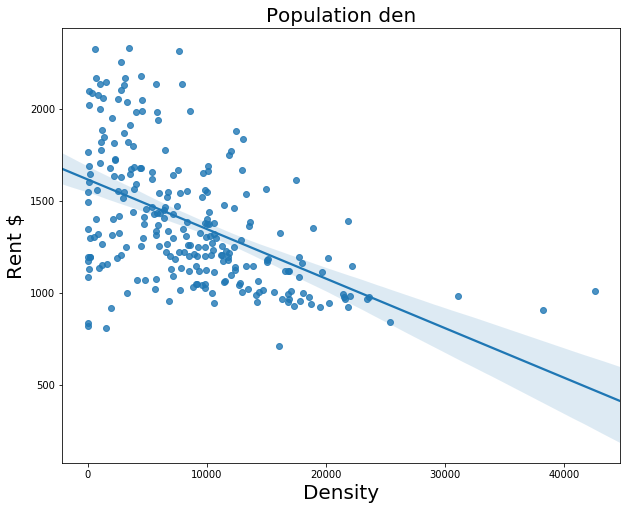

In [249]:
fig = plt.figure(figsize=(10,8))
ax = sns.regplot(x='Population per Sqmi', y='Amount', data=la_df_merge)
ax = plt.title("Population den",size = 20)
ax = plt.ylabel("Rent $",size= 20)
ax = plt.xlabel("Density",size= 20)

plt.savefig('dens.png')

In [79]:
# Correlation test using Pearson Coefficient
pearson_coef, p_value = stats.pearsonr(la_df_merge['Amount'], la_df_merge['Population per Sqmi'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P=", p_value)

The Pearson Correlation Coefficient is -0.5105518536019567  with a P-value of P= 2.4874869665212923e-18


## Explore Neighborhoods in LA County

#### Define Foursquare Credentials and Version

In [20]:

CLIENT_ID = '5HUS4HI54VP0KE1YGX1HFXZXSE0WH4OZSI1T4GII4NDPGYEE' # your Foursquare ID
CLIENT_SECRET = '1VLWSZYYLGTURGALAU0CBPTZT3YO1UNJ11CJ3I4Q0EWDAMG5' # your Foursquare Secret
VERSION = '20200605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5HUS4HI54VP0KE1YGX1HFXZXSE0WH4OZSI1T4GII4NDPGYEE
CLIENT_SECRET:1VLWSZYYLGTURGALAU0CBPTZT3YO1UNJ11CJ3I4Q0EWDAMG5


#### Create function to get venues categories

In [21]:
def get_caltogory_type(row):
    try:
        category_list = row['catogories']
    except:
        category_list = row['venue.categories']
    if len(category_list) ==0:
        return None
    else:
        return category_list[0]['name']

In [22]:
# lat=40.876551
# long=-73.910660
# url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
#             CLIENT_ID,CLIENT_SECRET,VERSION,lat,long,500,100)
# #result = requests.get(url).json()['response']['groups'][0]['items']
# result = requests.get(url).json()


#### Create a function that will make request API and get all the venues info that we need for later analysis 

In [26]:
def discover_la(names,latitude,longitude, radius=1000, limit = 100): # 1 mile radius
    venues_list=[]
    for name, lat, long in zip(names,latitude,longitude):
        print(name)
        # API request
        url = "https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,CLIENT_SECRET,VERSION,lat,long,radius,limit)
        # get request
        result = requests.get(url).json()['response']['groups'][0]['items']
        
        venues_list.append([(name,lat,long, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in result])
        
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [ ]:
# Calling te function create dataframe
la_venues = discover_la(la_df_merge["Neighborhood"],la_df_merge["Latitude"],
                                   la_df_merge["Longitude"])

In [ ]:
la_venues

In [ ]:
# save the dataframe to csv file
la_venues.to_csv(r'/Users/PaulTran/Desktop/projects/Coursera_Capstone/la_venues.csv')

In [29]:
# Read csv file. 
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
# reading the file
la_venue= pd.read_csv("la_venues.csv")
la_venue= la_venue.drop("Unnamed: 0",1)
print(la_venue.shape)
la_venue.head()

(12359, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Acton               34.46815              -118.19513   
1        Acton               34.46815              -118.19513   
2        Acton               34.46815              -118.19513   
3        Acton               34.46815              -118.19513   
4        Acton               34.46815              -118.19513   

                          Venue  Venue Latitude  Venue Longitude  \
0  Acton Market & Country Store       34.468595      -118.197626   
1        Fox Hay Feed and Grain       34.469565      -118.195481   
2               Powell Plumbing       34.468053      -118.196197   
3                  Acton Market       34.467628      -118.195892   
4               Specialty Truss       34.471011      -118.192703   

               Venue Category  
0               Grocery Store  
1                   Pet Store  
2                Home Service  
3               Grocery Store  
4  Construction & Landscaping

### Explore the dataset 

In [28]:
print('There are {} unique venue types.'.format(len(la_venue['Venue Category'].unique())))

There are 441 unique venue types.


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0        Acton               34.46815              -118.19513   
1        Acton               34.46815              -118.19513   
2        Acton               34.46815              -118.19513   
3        Acton               34.46815              -118.19513   
4        Acton               34.46815              -118.19513   

                          Venue  Venue Latitude  Venue Longitude  \
0  Acton Market & Country Store       34.468595      -118.197626   
1        Fox Hay Feed and Grain       34.469565      -118.195481   
2               Powell Plumbing       34.468053      -118.196197   
3                  Acton Market       34.467628      -118.195892   
4               Specialty Truss       34.471011      -118.192703   

               Venue Category  
0               Grocery Store  
1                   Pet Store  
2                Home Service  
3               Grocery Store  
4  Construction & Landscaping

In [30]:
la_venues_count = la_venue.groupby("Neighborhood").count().reset_index(drop=False)

In [31]:
la_venues_count.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  Venue  \
0            Acton                      9                       9      9   
1  Adams-Normandie                     76                      76     76   
2     Agoura Hills                     17                      17     17   
3       Agua Dulce                     10                      10     10   
4         Alhambra                     75                      75     75   

   Venue Latitude  Venue Longitude  Venue Category  
0               9                9               9  
1              76               76              76  
2              17               17              17  
3              10               10              10  
4              75               75              75

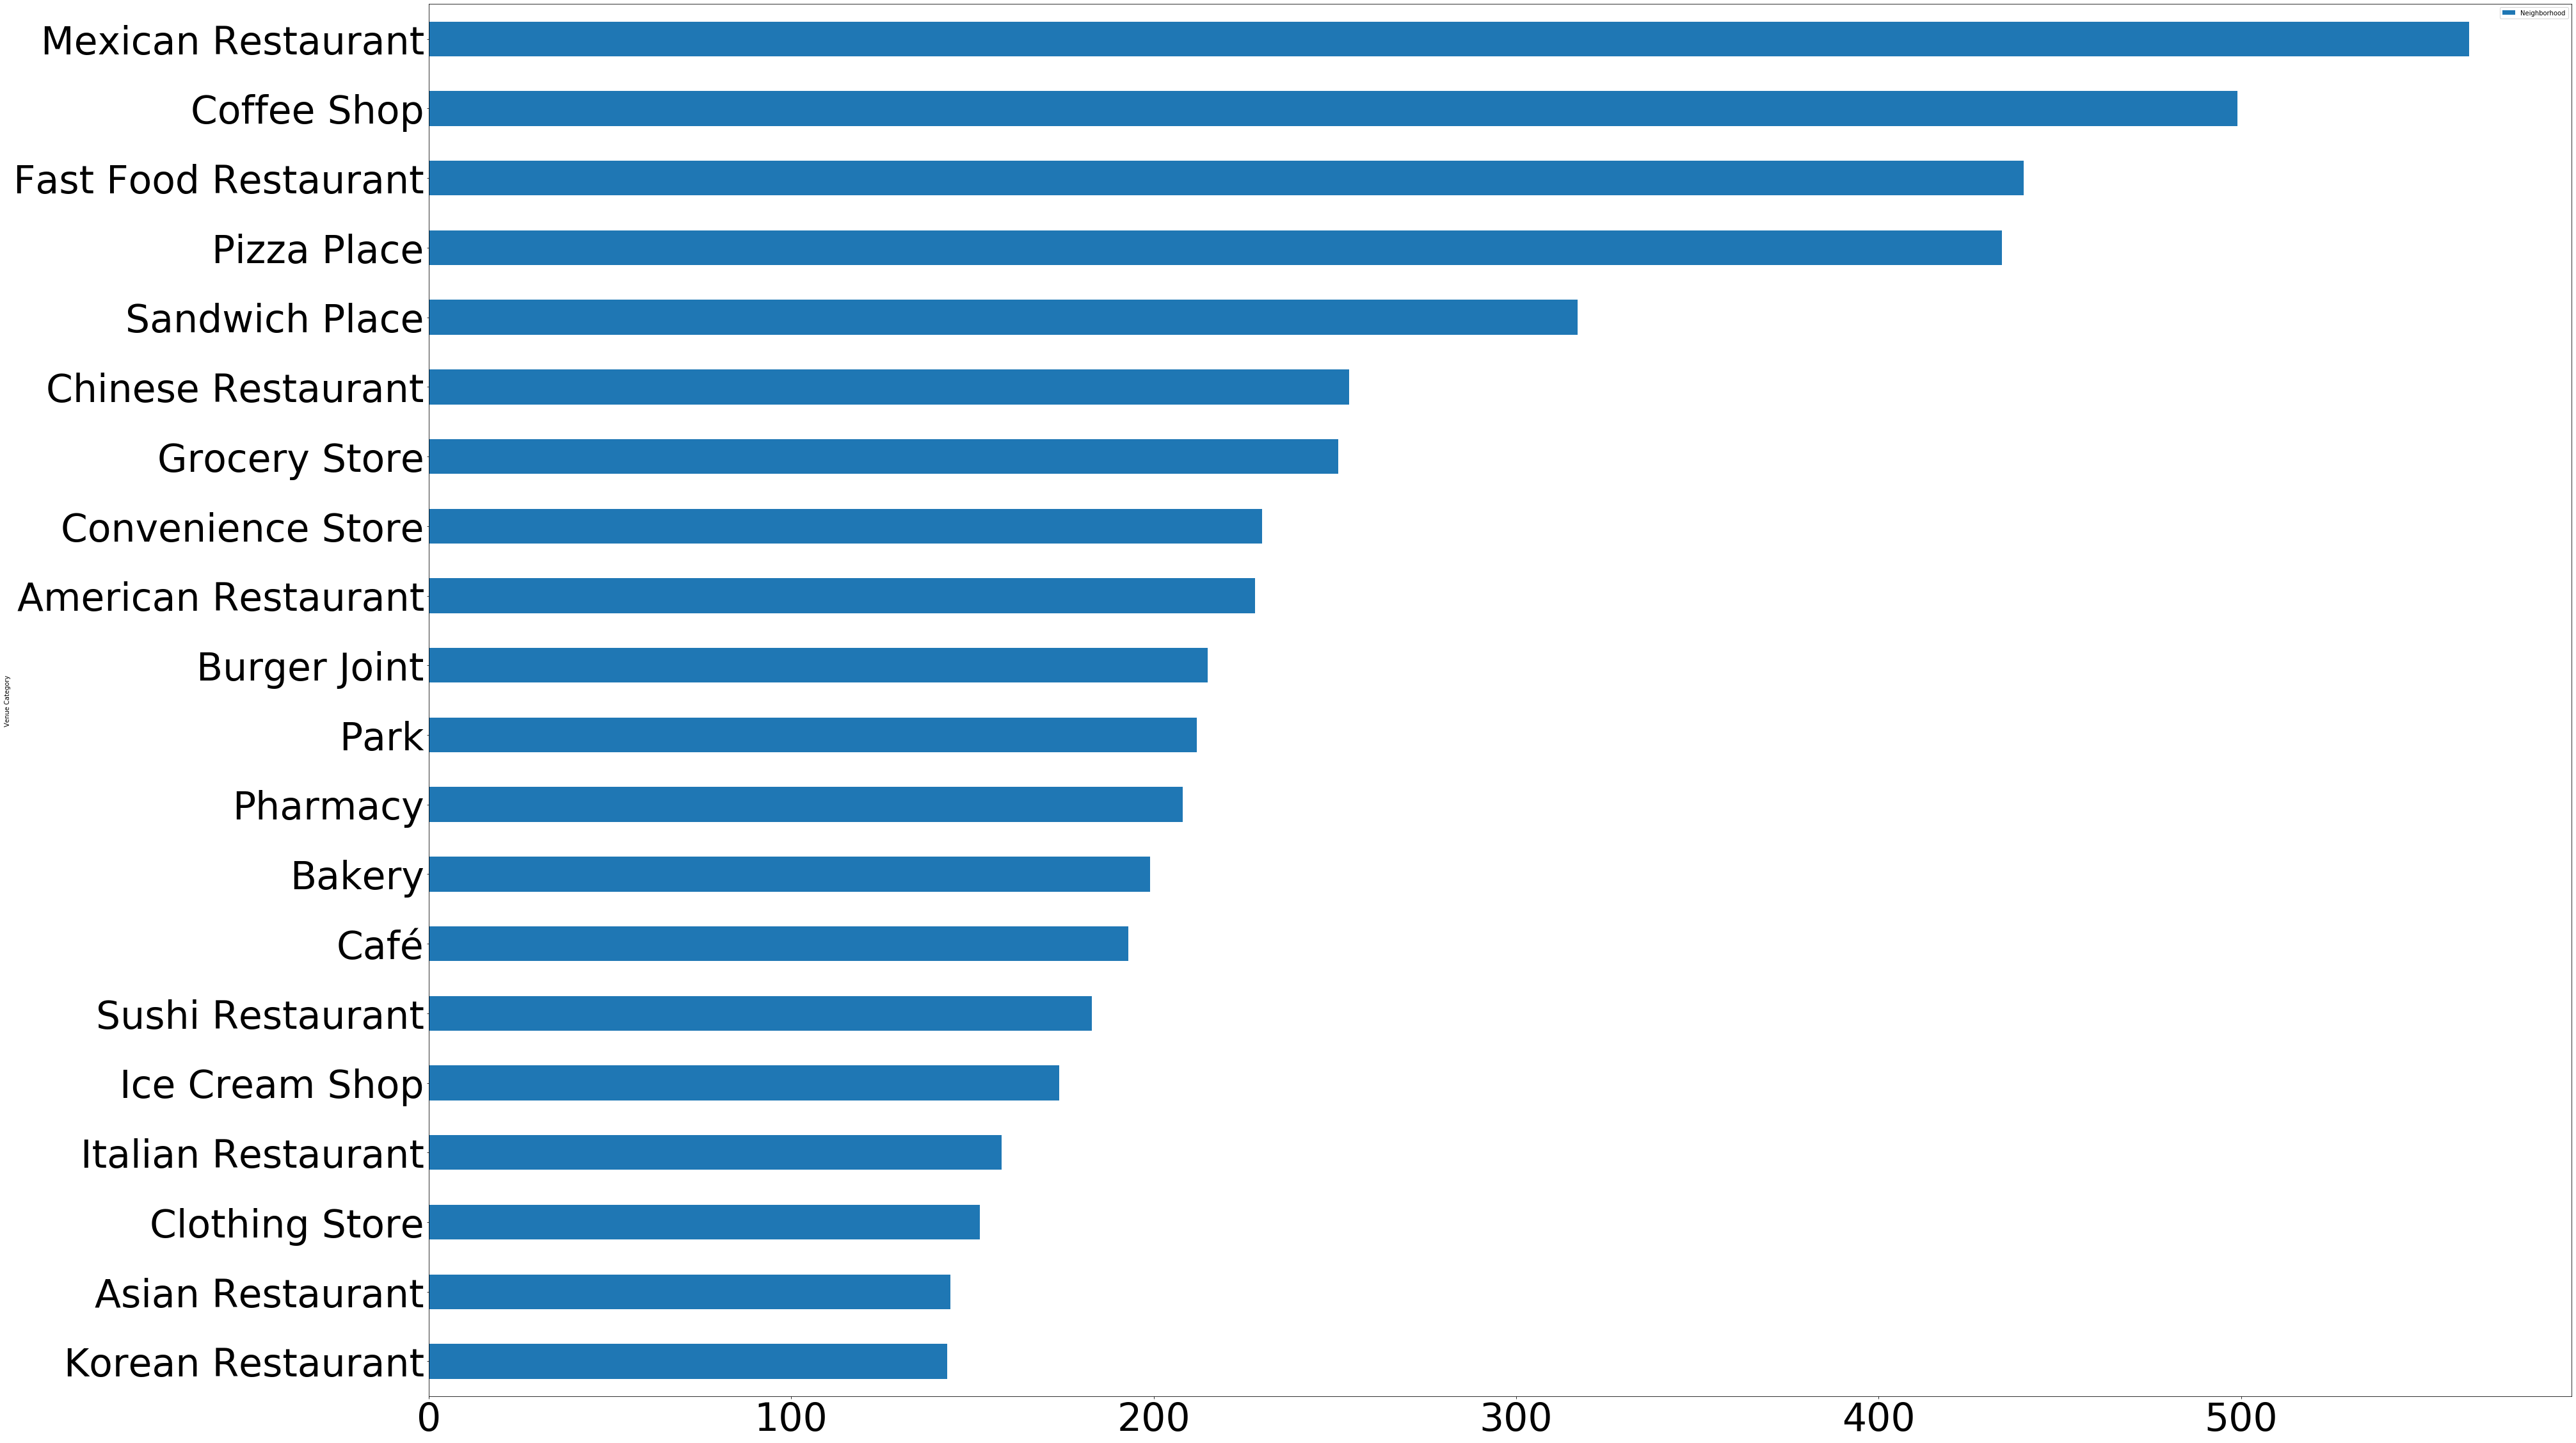

In [235]:
#Visualize the data by ploting a bar graph to see top 20 venues
import matplotlib.pyplot as plt
# Group the data by Venue Category
la_venues_cal = la_venue.groupby("Venue Category").count()
la_venues_cal=la_venues_cal.reset_index()
la_venues_cal.sort_values('Neighborhood',inplace=True,ascending=True)

#Plot to see the most 15 venues catagories in LA County.
la_venues_cal.tail(20).plot.barh(x='Venue Category', y='Neighborhood', fontsize = 60, figsize=(60, 40))

#### Base on the plot above, we could clearly see that, food restaurants businesses are dominate the County. Let modify the "Venue Category" by assigning them into the same Category that share the same characteristic. We will focus on Restaurant, Cafe, Market, Stores, School, University, Bar,Gym, Outdoor arear. 

In [133]:
# make a copy of the dataframe
la_venues_fix = la_venue.copy()

#Restaurant 
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Restaurant",regex=False),'Venue Category']="Restaurant"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Joint",regex=False),'Venue Category']="Restaurant"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Food",regex=False),'Venue Category']="Restaurant"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Place",regex=False),'Venue Category']="Restaurant"
la_venues_fix.loc[la_venues_fix['Venue Category'] == 'Diner', 'Venue Category'] = 'Restaurant'
la_venues_fix.loc[la_venues_fix['Venue Category'] == 'Noodle House', 'Venue Category'] = 'Restaurant'
la_venues_fix.loc[la_venues_fix['Venue Category'] == 'Buffet', 'Venue Category'] = 'Restaurant'
la_venues_fix.loc[la_venues_fix['Venue Category'] == 'Bistro', 'Venue Category'] = 'Restaurant'

#Cafe
la_venues_fix.loc[la_venues_fix["Venue Category"]== "Coffee Shop" , 'Venue Category']= "Café"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Cafe",regex=False),'Venue Category']="Café"

#Market
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Market",regex=False),'Venue Category']="Market"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Grocery Store",regex=False),'Venue Category']="Market"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Supermarket",regex=False),'Venue Category']="Market"

#Store
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Shop",regex=False),'Venue Category']="Store"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Store",regex=False),'Venue Category']="Store"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Supply",regex=False),'Venue Category']="Store"

#Sport Facility
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Gym",regex=False),'Venue Category']="Sport Facility"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Field",regex=False),'Venue Category']="Sport Facility"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Court",regex=False),'Venue Category']="Sport Facility"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Course",regex=False),'Venue Category']="Sport Facility"

#Bar
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Bar",regex=False),'Venue Category']="Bar"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Beer Garden",regex=False),'Venue Category']="Bar"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Pub",regex=False),'Venue Category']="Bar"

#Outdoor
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Park",regex=False),'Venue Category']="Outdoor Place"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Trail",regex=False),'Venue Category']="Outdoor Place"
la_venues_fix.loc[la_venues_fix['Venue Category'] == 'Playground', 'Venue Category'] = 'Outdoor Place'
la_venues_fix.loc[la_venues_fix['Venue Category'] == 'Lake', 'Venue Category'] = 'Outdoor Place'
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Garden",regex=False),'Venue Category']="Outdoor Place"

#Art and Museum
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Art",regex=False),'Venue Category']="Art and Museum"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Museum",regex=False),'Venue Category']="Art and Museum"

#Theater
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Theater",regex=False),'Venue Category']="Theater"

#Other
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("School",regex=False),'Venue Category']="School"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("University",regex=False),'Venue Category']="University"
la_venues_fix.loc[la_venues_fix["Venue Category"].str.contains("Stadium",regex=False),'Venue Category']="Stadium"


In [207]:

# one hot encoding
la_dumies_2 = pd.get_dummies(la_venues_fix[['Venue Category']], prefix="", prefix_sep="")

# add the neighborhood column
la_dumies_2['Neighborhood'] = la_venues_fix['Neighborhood']
## move Neiborhood to the first column
ne = la_dumies_2.pop("Neighborhood")
la_dumies_2.insert(0,"Neighborhood",ne)

# Group the as Neighborhood.
la_sum = la_dumies_2.groupby("Neighborhood").sum().reset_index(drop=False)
print(la_sum.shape)
la_sum.head()

(252, 185)


Neighborhood  ATM  Airport  Airport Gate  Airport Service  \
0            Acton    0        0             0                0   
1  Adams-Normandie    0        0             0                0   
2     Agoura Hills    0        0             0                0   
3       Agua Dulce    0        0             0                0   
4         Alhambra    0        0             0                0   

   Airport Terminal  Amphitheater  Aquarium  Arcade  Art and Museum  \
0                 0             0         0       0               0   
1                 0             0         0       0               0   
2                 0             0         0       0               0   
3                 0             0         0       0               0   
4                 0             0         0       0               1   

   Astrologer  Athletics & Sports  Auto Dealership  Auto Garage  \
0           0                   0                0            0   
1           0                   0                0            0   
2           0                   0                0            0   
3           0                   0                0            0   
4           0                   0                1            0   

   Auto Workshop  Bakery  Bank  Bar  Beach  Bed & Breakfast  \
0              0       0     0    0      0                0   
1              0       3     1    9      0                0   
2              0       0     0    0      0                0   
3              0       1     0    0      0                0   
4              0       3     3    1      0                0   

   Bike Rental / Bike Share  Boat or Ferry  Bookstore  Border Crossing  \
0                         0              0          0                0   
1                         0              0          1                0   
2                         0              0          0                0   
3                         0              0          0                0   
4                         0              0          1                0   

   Boutique  Bowling Alley  Breakfast Spot  Brewery  Building  Bus Line  \
0         0              0               0        0         0         0   
1         1              0               1        0         0         0   
2         0              0               0        0         0         0   
3         0              0               0        0         0         0   
4         0              0               0        0         0         0   

   Bus Station  Bus Stop  Business Service  Butcher  Café  Campground  Canal  \
0            0         0                 0        0     0           0      0   
1            0         0                 0        0     6           0      0   
2            0         0                 0        0     0           0      0   
3            0         0                 1        0     1           0      0   
4            0         0                 0        0     3           0      0   

   Car Wash  Casino  Cemetery  Check Cashing Service  Child Care Service  \
0         0       0         0                      0                   0   
1         0       0         0                      0                   0   
2         1       0         0                      0                   0   
3         0       0         0                      0                   0   
4         0       0         0                      0                   0   

   Church  Circus  City Hall  College Bookstore  College Classroom  \
0       0       0          0                  0                  0   
1       0       0          0                  0                  0   
2       0       0          0                  0                  0   
3       0       0          0                  0                  0   
4       0       0          0                  0                  0   

   College Quad  College Residence Hall  Comedy Club  Community Center  \
0             0                       0            0             

There are 252 rows represent for 252 different areas in LA County, with 185 venues after we reformatted  the venues' categories. We are just going to figure out the correlation between top selected venues of the LA County. 

In [229]:
la_venues_fix['Venue Category'].value_counts()

Restaurant                                  5051
Store                                       2532
Café                                         703
Bar                                          510
Market                                       386
Outdoor Place                                355
Sport Facility                               294
Pharmacy                                     208
Bakery                                       199
Bank                                         143
Art and Museum                               133
Hotel                                        129
Theater                                      127
Breakfast Spot                               114
Spa                                           74
Gas Station                                   60
Rental Car Location                           53
Deli / Bodega                                 52
Bookstore                                     46
Steakhouse                                    43
ATM                 

In [136]:
#Selected venues
la_sum_fix = la_sum[["Neighborhood","Restaurant","Store","Café","Bar","Market",
                     "Outdoor Place","Sport Facility","Pharmacy","Bakery",
                     "Bank","Art and Museum","Hotel","Theater","Spa","Breakfast Spot",
                    "Gas Station","School","University"]]

In [137]:
la_sum_fix.head()


Neighborhood  Restaurant  Store  Café  Bar  Market  Outdoor Place  \
0            Acton           0      1     0    0       2              2   
1  Adams-Normandie          30      9     6    9       3              0   
2     Agoura Hills           5      1     0    0       0              2   
3       Agua Dulce           2      2     1    0       1              1   
4         Alhambra          27     18     3    1       6              2   

   Sport Facility  Pharmacy  Bakery  Bank  Art and Museum  Hotel  Theater  \
0               0         0       0     0               0      0        0   
1               0         2       3     1               0      0        2   
2               2         0       0     0               0      2        0   
3               0         0       1     0               0      0        0   
4               1         0       3     3               1      0        1   

   Spa  Breakfast Spot  Gas Station  School  University  
0    0               0            0       0           0  
1    2               1            1       0           0  
2    0               0            1       0           1  
3    0               0            0       0           0  
4    0               0            0       0           0

In [230]:
#Add the Amount colums back to the dataframe
la_final_reg = la_sum_fix.merge(la_df_merge[["Neighborhood","Amount"]],on="Neighborhood")
la_final_reg.head()

Neighborhood  Restaurant  Store  Café  Bar  Market  Outdoor Place  \
0            Acton           0      1     0    0       2              2   
1  Adams-Normandie          30      9     6    9       3              0   
2     Agoura Hills           5      1     0    0       0              2   
3       Agua Dulce           2      2     1    0       1              1   
4         Alhambra          27     18     3    1       6              2   

   Sport Facility  Pharmacy  Bakery  Bank  Art and Museum  Hotel  Theater  \
0               0         0       0     0               0      0        0   
1               0         2       3     1               0      0        2   
2               2         0       0     0               0      2        0   
3               0         0       1     0               0      0        0   
4               1         0       3     3               1      0        1   

   Spa  Breakfast Spot  Gas Station  School  University   Amount  
0    0               0            0       0           0  1647.50  
1    2               1            1       0           0   920.74  
2    0               0            1       0           1  2052.50  
3    0               0            0       0           0  1130.20  
4    0               0            0       0           0  1205.56

### Scatter plots and Pearson Correlation
At this point, we are able to plots and find out the correlation between venues and  renting prices. 

Scatter plots of each category versus were also used to demonstrate the relationship between selected surrounding venues and life renting price. Correlation test was also performed here to test the statistical significance of the correlation. Each category of resources shows both positive and negative correlation with renting price, However, the result does not seem to be promising. The Pearson coefficients are low, most of them are almost to 0, demonstrate weak relationship. Sport Facility shows the highest correlation with rent price (r = 0.27).Sport Facility also has statistically significant at $\alpha$<0.001, shows its strongly certainty in the result.  

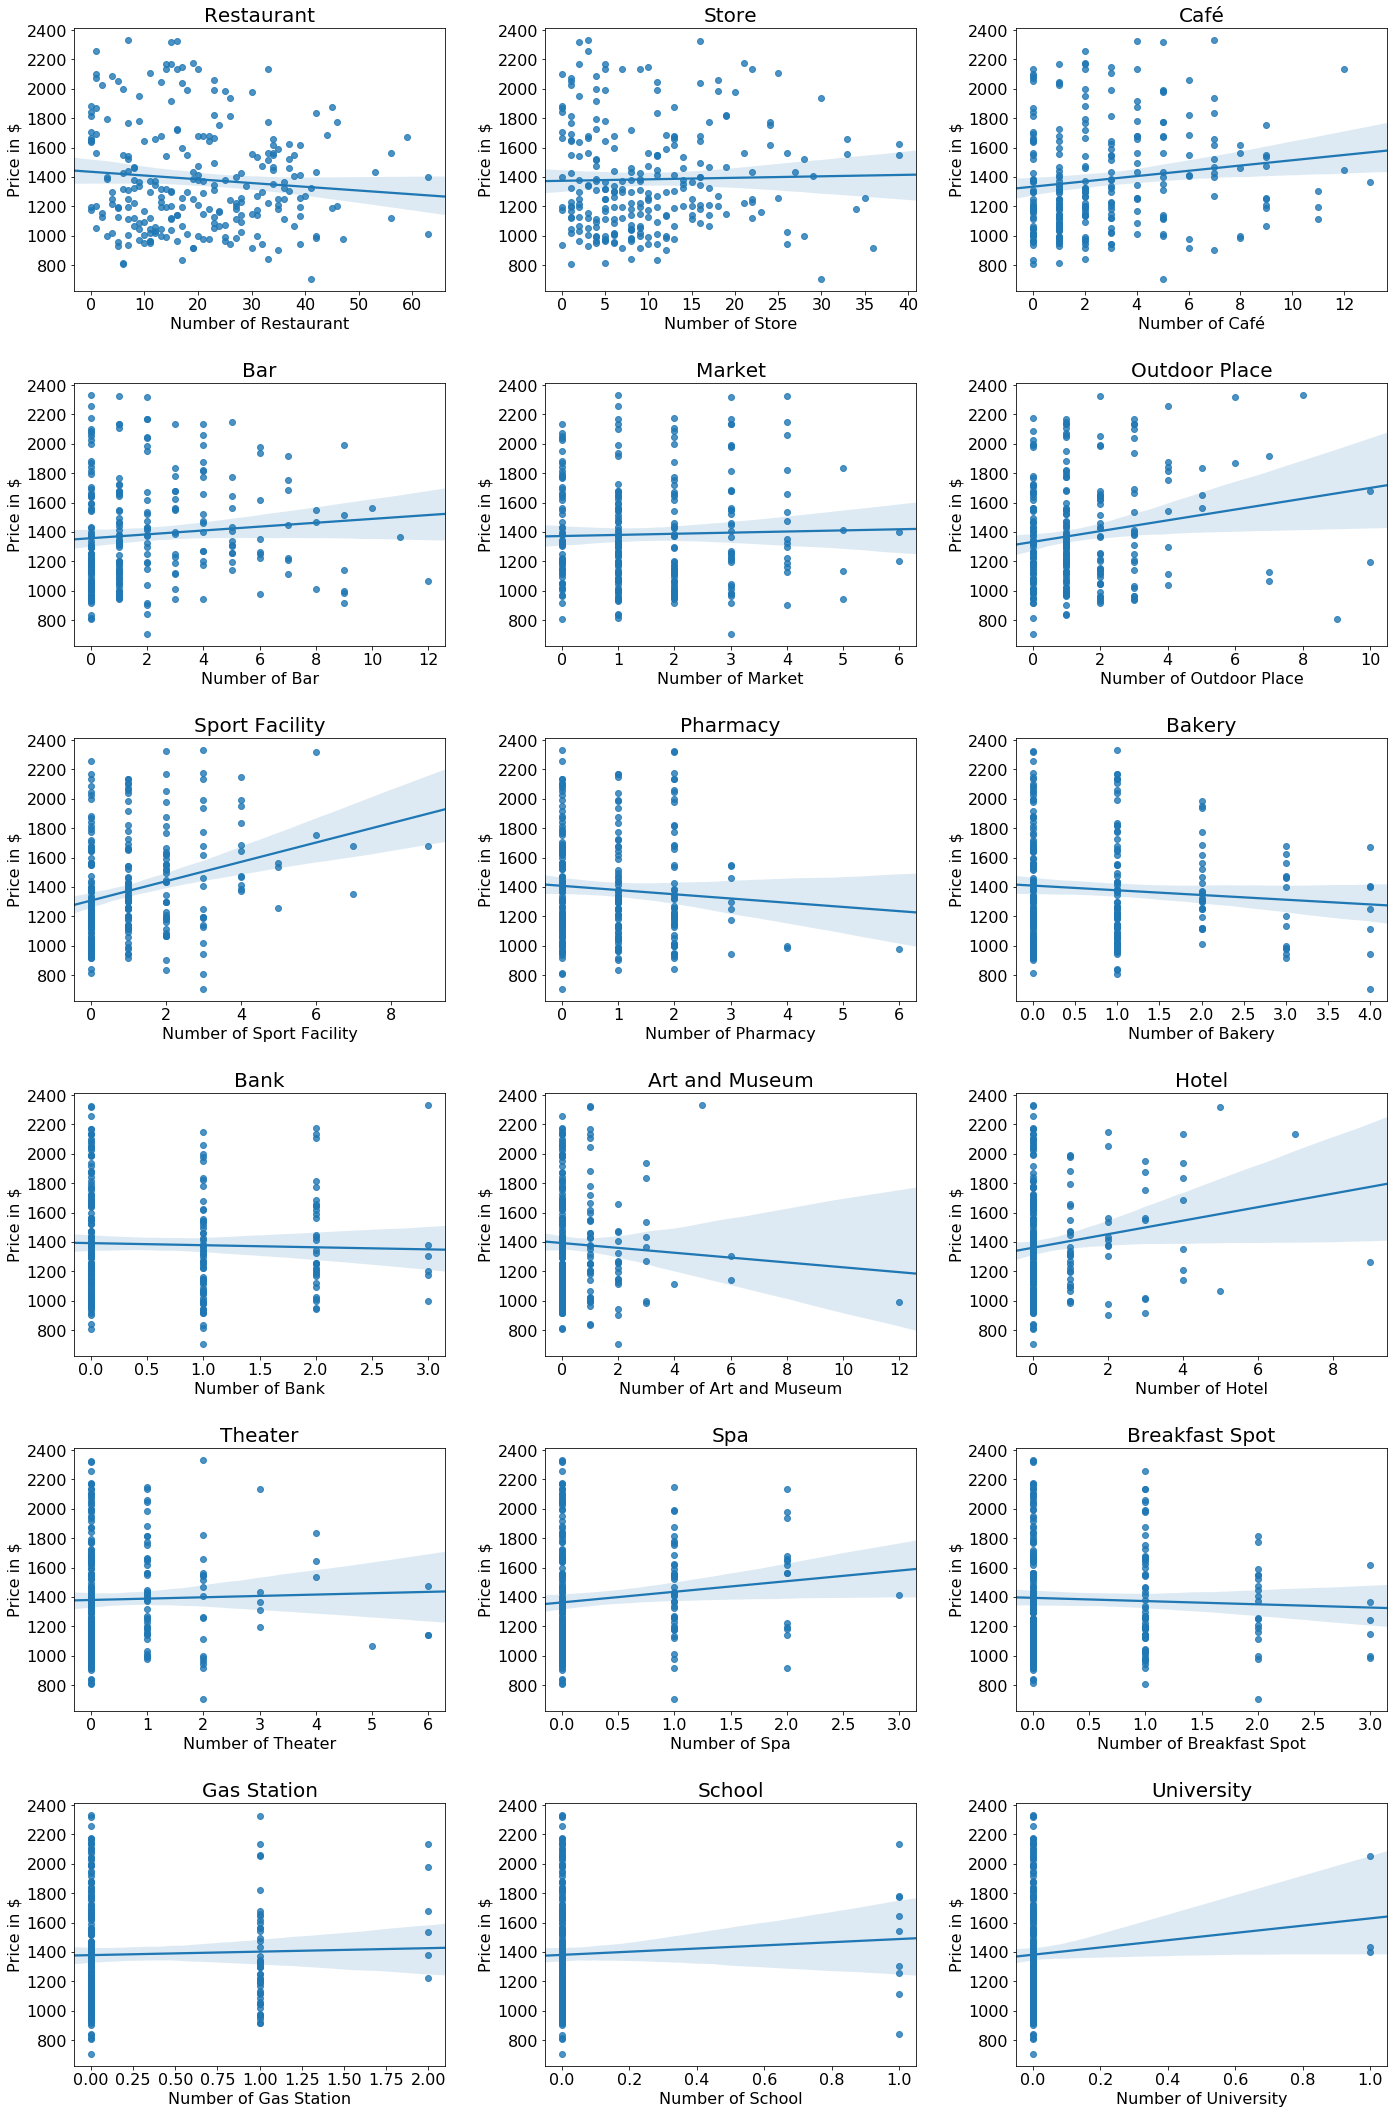

In [245]:
# Import seaborn for regression plot
import seaborn as sns 

#Plot
fig = plt.figure(figsize=(20,30))

#loop through the list of venues
for i,j in enumerate (la_final_reg.columns[1:19]):
    ax1 = fig.add_subplot(6,3,i+1)
    ax1 = sns.regplot(x=j, y='Amount', data=la_final_reg,)
    ax1 = plt.title(j,size=20)
    ax1 = plt.xlabel("Number of {}".format(j),size=16)
    ax1 = plt.ylabel("Price in $",size=16)
    ax1 = plt.xticks(size=16)
    ax1 = plt.yticks(size=16)
fig.tight_layout(pad=3.0)
plt.savefig('plot.png')
plt.show()

In [234]:
# Calculate the collection coefficient: pearson_coef and p_value
person=[]
p_val = []
feature=la_final_reg.columns[1:19]
for i in feature:
    pearson_coef, p_value = stats.pearsonr(la_final_reg['Amount'], la_final_reg[i])
    print(i,": The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P=", p_value)
    person.append(pearson_coef)
    p_val.append(p_value)

Restaurant : The Pearson Correlation Coefficient is -0.09706951066940894  with a P-value of P= 0.12431748990119786
Store : The Pearson Correlation Coefficient is 0.023556839627560507  with a P-value of P= 0.7097843624543119
Café : The Pearson Correlation Coefficient is 0.1413528893504422  with a P-value of P= 0.024830429627487004
Bar : The Pearson Correlation Coefficient is 0.09180670429036566  with a P-value of P= 0.14616510623375153
Market : The Pearson Correlation Coefficient is 0.02803749545224702  with a P-value of P= 0.6577977490104379
Outdoor Place : The Pearson Correlation Coefficient is 0.17570191979736852  with a P-value of P= 0.005156245476158113
Sport Facility : The Pearson Correlation Coefficient is 0.2735473714876916  with a P-value of P= 1.0571047058179515e-05
Pharmacy : The Pearson Correlation Coefficient is -0.0778486307367422  with a P-value of P= 0.21812302648012824
Bakery : The Pearson Correlation Coefficient is -0.09134909979239711  with a P-value of P= 0.148194787

In [232]:
# Create a dataframe of collection coefficient:
cor = pd.DataFrame(list(zip(feature,person,p_val)),columns=["Features",
                                                             "Pearson Correlation Coefficient",
                                                            "P-value"])
cor

Features  Pearson Correlation Coefficient   P-value
0       Restaurant                        -0.097070  0.124317
1            Store                         0.023557  0.709784
2             Café                         0.141353  0.024830
3              Bar                         0.091807  0.146165
4           Market                         0.028037  0.657798
5    Outdoor Place                         0.175702  0.005156
6   Sport Facility                         0.273547  0.000011
7         Pharmacy                        -0.077849  0.218123
8           Bakery                        -0.091349  0.148195
9             Bank                        -0.031805  0.615308
10  Art and Museum                        -0.055922  0.376691
11           Hotel                         0.156273  0.013003
12         Theater                         0.026901  0.670842
13             Spa                         0.118287  0.060792
14  Breakfast Spot                        -0.045322  0.473836
15     Gas Station                         0.031765  0.615758
16          School                         0.055927  0.376650

## Clustering Neighborhoods
The elbow method with the sum of squared distances was used to find the optimal number of clusters. Using the normalized number of resources in each category and the number of clusters, the communities were clustered into different groups using k-means clustering.

In [184]:
# Prepare the data for clustering
la_venues_mean = la_dumies_2.groupby("Neighborhood").mean().reset_index(drop=False)
print(la_venues_mean.shape)
la_venues_mean.head()

(252, 185)


Neighborhood  ATM  Airport  Airport Gate  Airport Service  \
0            Acton  0.0      0.0           0.0              0.0   
1  Adams-Normandie  0.0      0.0           0.0              0.0   
2     Agoura Hills  0.0      0.0           0.0              0.0   
3       Agua Dulce  0.0      0.0           0.0              0.0   
4         Alhambra  0.0      0.0           0.0              0.0   

   Airport Terminal  Amphitheater  Aquarium  Arcade  Art and Museum  \
0               0.0           0.0       0.0     0.0        0.000000   
1               0.0           0.0       0.0     0.0        0.000000   
2               0.0           0.0       0.0     0.0        0.000000   
3               0.0           0.0       0.0     0.0        0.000000   
4               0.0           0.0       0.0     0.0        0.013333   

   Astrologer  Athletics & Sports  Auto Dealership  Auto Garage  \
0         0.0                 0.0         0.000000          0.0   
1         0.0                 0.0         0.000000          0.0   
2         0.0                 0.0         0.000000          0.0   
3         0.0                 0.0         0.000000          0.0   
4         0.0                 0.0         0.013333          0.0   

   Auto Workshop    Bakery      Bank       Bar  Beach  Bed & Breakfast  \
0            0.0  0.000000  0.000000  0.000000    0.0              0.0   
1            0.0  0.039474  0.013158  0.118421    0.0              0.0   
2            0.0  0.000000  0.000000  0.000000    0.0              0.0   
3            0.0  0.100000  0.000000  0.000000    0.0              0.0   
4            0.0  0.040000  0.040000  0.013333    0.0              0.0   

   Bike Rental / Bike Share  Boat or Ferry  Bookstore  Border Crossing  \
0                       0.0            0.0   0.000000              0.0   
1                       0.0            0.0   0.013158              0.0   
2                       0.0            0.0   0.000000              0.0   
3                       0.0            0.0   0.000000              0.0   
4                       0.0            0.0   0.013333              0.0   

   Boutique  Bowling Alley  Breakfast Spot  Brewery  Building  Bus Line  \
0  0.000000            0.0        0.000000      0.0       0.0       0.0   
1  0.013158            0.0        0.013158      0.0       0.0       0.0   
2  0.000000            0.0        0.000000      0.0       0.0       0.0   
3  0.000000            0.0        0.000000      0.0       0.0       0.0   
4  0.000000            0.0        0.000000      0.0       0.0       0.0   

   Bus Station  Bus Stop  Business Service  Butcher      Café  Campground  \
0          0.0       0.0               0.0      0.0  0.000000         0.0   
1          0.0       0.0               0.0      0.0  0.078947         0.0   
2          0.0       0.0               0.0      0.0  0.000000         0.0   
3          0.0       0.0               0.1      0.0  0.100000         0.0   
4          0.0       0.0               0.0      0.0  0.040000         0.0   

   Canal  Car Wash  Casino  Cemetery  Check Cashing Service  \
0    0.0  0.000000     0.0       0.0                    0.0   
1    0.0  0.000000     0.0       0.0                    0.0   
2    0.0  0.058824     0.0       0.0                    0.0   
3    0.0  0.000000     0.0       0.0                    0.0   
4    0.0  0.000000     0.0       0.0                    0.0   

   Child Care Service  Church  Circus  City Hall  College Bookstore  \
0                 0.0     0.0     0.0        0.0                0.0   
1                 0.0     0.0     0.0        0.0                0.0   
2                 0.0     0.0     0.0        0.0                0.0   
3                 0.0     0.0     0.0        0.0                0.0   
4                 0.0     0.0     0.0        0.0                0.0   

   College Classroom  College Quad  College Residence Hall  Comedy Club  \
0                0.0           0.0                     0.0          0.0   
1            

In [185]:
# Create a funtions that return most common venues
def most_common_venues(row,num):
    row_category = row.iloc[1:]
    row_categoryo_sorted = row_category.sort_values(ascending=False)
    
    return row_categoryo_sorted.index.values[0:num]

In [186]:
#create the new dataframe and display the top 10 venues for each neighborhood
num_top = 10
indicator = ["st","nd","rd"]
colunms = ["Neighborhood"]

# Format the columns' name 
for ind in np.arange(num_top):
    try:
        colunms.append("{}{} Most venues".format(ind+1,indicator[ind]))
    except:
        colunms.append("{}th most venues".format(ind+1))

top10_data  = pd.DataFrame(columns=colunms)
top10_data['Neighborhood'] = la_venues_mean['Neighborhood']

# Calling the funtion most_common_venues  
for i in np.arange(la_venues_mean.shape[0]):
    top10_data.loc[i,1:] = most_common_venues(la_venues_mean.loc[i,:],num_top)
top10_data.head()

Neighborhood 1st Most venues             2nd Most venues  \
0            Acton          Market  Construction & Landscaping   
1  Adams-Normandie      Restaurant                       Store   
2     Agoura Hills      Restaurant                       Hotel   
3       Agua Dulce           Store                  Restaurant   
4         Alhambra      Restaurant                       Store   

  3rd Most venues  4th most venues 5th most venues   6th most venues  \
0   Outdoor Place  Nature Preserve           Store      Home Service   
1             Bar             Café          Market            Bakery   
2   Outdoor Place   Sport Facility       Gastropub        University   
3          Market     Home Service   Outdoor Place  Business Service   
4          Market             Café            Bank            Bakery   

   7th most venues 8th most venues   9th most venues 10th most venues  
0      Dry Cleaner       Drugstore           Dog Run  Doctor's Office  
1          Theater             Spa          Pharmacy             Bank  
2  Laundry Service        Car Wash             Store      Gas Station  
3             Café          Bakery               Zoo          Dog Run  
4    Outdoor Place        Tea Room  Insurance Office          Theater

In [187]:
top10_data.shape

(252, 11)

In [188]:
#data for clusterting
la_cluster= la_venues_mean.drop("Neighborhood",axis=1)
la_cluster.head()

ATM  Airport  Airport Gate  Airport Service  Airport Terminal  \
0  0.0      0.0           0.0              0.0               0.0   
1  0.0      0.0           0.0              0.0               0.0   
2  0.0      0.0           0.0              0.0               0.0   
3  0.0      0.0           0.0              0.0               0.0   
4  0.0      0.0           0.0              0.0               0.0   

   Amphitheater  Aquarium  Arcade  Art and Museum  Astrologer  \
0           0.0       0.0     0.0        0.000000         0.0   
1           0.0       0.0     0.0        0.000000         0.0   
2           0.0       0.0     0.0        0.000000         0.0   
3           0.0       0.0     0.0        0.000000         0.0   
4           0.0       0.0     0.0        0.013333         0.0   

   Athletics & Sports  Auto Dealership  Auto Garage  Auto Workshop    Bakery  \
0                 0.0         0.000000          0.0            0.0  0.000000   
1                 0.0         0.000000          0.0            0.0  0.039474   
2                 0.0         0.000000          0.0            0.0  0.000000   
3                 0.0         0.000000          0.0            0.0  0.100000   
4                 0.0         0.013333          0.0            0.0  0.040000   

       Bank       Bar  Beach  Bed & Breakfast  Bike Rental / Bike Share  \
0  0.000000  0.000000    0.0              0.0                       0.0   
1  0.013158  0.118421    0.0              0.0                       0.0   
2  0.000000  0.000000    0.0              0.0                       0.0   
3  0.000000  0.000000    0.0              0.0                       0.0   
4  0.040000  0.013333    0.0              0.0                       0.0   

   Boat or Ferry  Bookstore  Border Crossing  Boutique  Bowling Alley  \
0            0.0   0.000000              0.0  0.000000            0.0   
1            0.0   0.013158              0.0  0.013158            0.0   
2            0.0   0.000000              0.0  0.000000            0.0   
3            0.0   0.000000              0.0  0.000000            0.0   
4            0.0   0.013333              0.0  0.000000            0.0   

   Breakfast Spot  Brewery  Building  Bus Line  Bus Station  Bus Stop  \
0        0.000000      0.0       0.0       0.0          0.0       0.0   
1        0.013158      0.0       0.0       0.0          0.0       0.0   
2        0.000000      0.0       0.0       0.0          0.0       0.0   
3        0.000000      0.0       0.0       0.0          0.0       0.0   
4        0.000000      0.0       0.0       0.0          0.0       0.0   

   Business Service  Butcher      Café  Campground  Canal  Car Wash  Casino  \
0               0.0      0.0  0.000000         0.0    0.0  0.000000     0.0   
1               0.0      0.0  0.078947         0.0    0.0  0.000000     0.0   
2               0.0      0.0  0.000000         0.0    0.0  0.058824     0.0   
3               0.1      0.0  0.100000         0.0    0.0  0.000000     0.0   
4               0.0      0.0  0.040000         0.0    0.0  0.000000     0.0   

   Cemetery  Check Cashing Service  Child Care Service  Church  Circus  \
0       0.0                    0.0                 0.0     0.0     0.0   
1       0.0                    0.0                 0.0     0.0     0.0   
2       0.0                    0.0                 0.0     0.0     0.0   
3       0.0                    0.0                 0.0     0.0     0.0   
4       0.0                    0.0                 0.0     0.0     0.0   

   City Hall  College Bookstore  College Classroom  College Quad  \
0        0.0                0.0                0.0           0.0   
1        0.0                0.0                0.0           0.0   
2        0.0                0.0                0.0           0.0   
3        0.0                0.0                0.0           0.0   
4        0.0                0.0                0.0           0.0   

   College Residence Hall  Comedy Club  Community Center  Concer


The elbow method with the sum of squared distances are used to optimize the number of clusters.

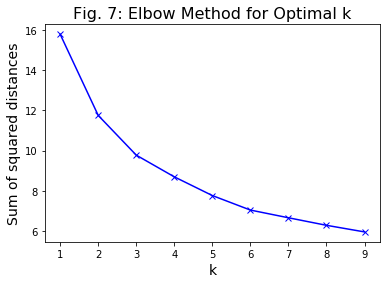

In [250]:
# Elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
score=[]
for i in range(1,10):
    kmean = KMeans(init="k-means++", n_clusters=i, random_state = 0).fit(la_cluster)
    score.append(kmean.inertia_)

# Plot of sum of squared distances
plt.plot(range(1,10),score,'bx-')  
plt.xlabel('k', fontsize=14)
plt.ylabel('Sum of squared distances', fontsize=14)
plt.title('Fig. 7: Elbow Method for Optimal k', fontsize=16)

plt.savefig('eye.png')
plt.show()

As we can see, we will choose k = 3

In [190]:
# Cluster into 3 groups
kmean_choice = kmean = KMeans(init="k-means++", n_clusters=3, random_state = 0).fit(la_cluster)
top10_data["labels"]= kmean_choice.labels_
top10_data

Neighborhood 1st Most venues  \
0                                    Acton          Market   
1                          Adams-Normandie      Restaurant   
2                             Agoura Hills      Restaurant   
3                               Agua Dulce           Store   
4                                 Alhambra      Restaurant   
5                             Alondra Park      Restaurant   
6                                 Altadena           Store   
7                                  Arcadia      Restaurant   
8                                   Arleta      Restaurant   
9                        Arlington Heights      Restaurant   
10                                 Artesia      Restaurant   
11                                  Athens      Restaurant   
12                         Atwater Village      Restaurant   
13                                  Avalon      Restaurant   
14                         Avocado Heights      Restaurant   
15                                   Azusa      Restaurant   
16                  Baldwin Hills/Crenshaw      Restaurant   
17                            Baldwin Park      Restaurant   
18                                 Bel-Air            Café   
19                                    Bell      Restaurant   
20                            Bell Gardens      Restaurant   
21                              Bellflower      Restaurant   
22                           Beverly Crest   Outdoor Place   
23                           Beverly Grove   Historic Site   
24                           Beverly Hills           Store   
25                             Beverlywood      Restaurant   
26                           Boyle Heights      Restaurant   
27                                Bradbury      Restaurant   
28                               Brentwood      Restaurant   
29                     Broadway-Manchester      Restaurant   
30                                 Burbank      Restaurant   
31                               Calabasas      Restaurant   
32                             Canoga Park      Restaurant   
33                                  Carson      Restaurant   
34                                 Carthay   Outdoor Place   
35                                 Castaic      Restaurant   
36                         Central-Alameda      Restaurant   
37                            Century City      Restaurant   
38                                Cerritos      Restaurant   
39                             Charter Oak      Restaurant   
40                              Chatsworth      Restaurant   
41                     Chesterfield Square      Restaurant   
42                           Cheviot Hills      Restaurant   
43                               Chinatown      Restaurant   
44                                  Citrus      Restaurant   
45                               Claremont      Restaurant   
46                                Commerce           Store   
47                                 Compton      Restaurant   
48                                  Covina      Restaurant   
49                                  Cudahy      Restaurant   
50                             Culver City      Restaurant   
51                            Cypress Park      Restaurant   
52                                Del Aire      Restaurant   
53                                 Del Rey      Restaurant   
54                             Diamond Bar           Store   
55                                  Downey      Restaurant   
56                                Downtown      Restaurant   
57                                  Duarte      Restaurant   
58                              Eagle Rock      Restaurant   
59                            East Compton      Restaurant   
60                          East Hollywood      Restaurant   
61                          East La Mirada      Restaurant   
62                        East Los Angeles      Restaurant   
63                           East Pasadena      Restaurant   


In [191]:
#Final 
la_cluster_final = la_df_merge
la_cluster_final = la_cluster_final.merge(top10_data.set_index("Neighborhood"),on="Neighborhood")


In [192]:
la_cluster_final.head(20)

Neighborhood   Amount  Population per Sqmi  Latitude  Longitude  \
0                    Acton  1647.50                  166  34.46815 -118.19513   
1          Adams-Normandie   920.74                21848  34.07809 -118.30120   
2             Agoura Hills  2052.50                 2495  34.14611 -118.77812   
3               Agua Dulce  1130.20                   99  34.49570 -118.32621   
4                 Alhambra  1205.56                11275  34.09370 -118.12727   
5             Alondra Park  1667.14                 7548  33.88930 -118.33061   
6                 Altadena  1458.32                 4900  34.18556 -118.13152   
7                  Arcadia  1375.32                 4749  34.13635 -118.03867   
8                   Arleta  1550.45                10034  34.24905 -118.43349   
9        Arlington Heights   993.79                21423  34.03989 -118.32542   
10                 Artesia  1400.33                10036  33.86114 -118.07968   
11                  Athens   953.57                 6829  33.93098 -118.29207   
12         Atwater Village  1258.81                 8379  34.11970 -118.25887   
13                  Avalon  1263.00                 1159  33.34411 -118.32139   
14         Avocado Heights  1369.43                 5907  34.03597 -117.99058   
15                   Azusa  1255.84                 4496  34.13361 -117.90589   
16  Baldwin Hills/Crenshaw  1000.10                10446  34.01043 -118.33666   
17            Baldwin Park  1208.00                11176  34.08536 -117.96035   
18                 Bel-Air  1885.29                 1207  34.08361 -118.43483   
19                    Bell  1002.35                14357  33.97977 -118.18885   

   1st Most venues             2nd Most venues 3rd Most venues  \
0           Market  Construction & Landscaping   Outdoor Place   
1       Restaurant                       Store             Bar   
2       Restaurant                       Hotel   Outdoor Place   
3            Store                  Restaurant          Market   
4       Restaurant                       Store          Market   
5       Restaurant                       Store   Outdoor Place   
6            Store                  Restaurant  Sport Facility   
7       Restaurant                       Store  Sport Facility   
8       Restaurant                       Store    Home Service   
9       Restaurant                       Store    Intersection   
10      Restaurant                       Store          Market   
11      Restaurant                       Store    Intersection   
12      Restaurant                       Store            Café   
13      Restaurant               Boat or Ferry           Hotel   
14      Restaurant                       Store   Outdoor Place   
15      Restaurant                       Store            Café   
16      Restaurant                       Store            Café   
17      Restaurant                       Store          Market   
18            Café                        Road         Theater   
19      Restaurant                       Store          Market   

     4th most venues 5th most venues     6th most venues  \
0    Nature Preserve           Store        Home Service   
1               Café          Market              Bakery   
2     Sport Facility       Gastropub          University   
3       Home Service   Outdoor Place    Business Service   
4               Café            Bank              Bakery   
5               Café  Sport Facility              Market   
6             Market            Café      Art and Museum   
7              Hotel  Breakfast Spot           Racetrack   
8      Historic Site             Spa         Bus Station   
9             Market          Bakery        Dance Studio   
10              Café          Bakery                 Bar   
11  Storage Facility   Boat or Ferry  Light Rail Station   
12               Bar  Sport Facility              Market   
13               Bar           Store     Harbor / Marina   
14            Market     

#### Choropleth map of rent of LA communities
This map is an combination that visualize the rent price, population density and also all three clusters.
As the map displayed:
<li> Cluster 0 (Red): Community that has medium population density, Coastal area, business area, average rent prices  </li>
<li> Cluster 1 (Violet): Community that has big population density, most counts, business area,  less expensive area </li>
<li> Cluster 2 (Blue):Community that has smallest population density, less count, more expensive area, more outdoor places </li>
    

In [194]:
# Choropleth map of rent of LA communities
final_map = folium.Map(location=[lat,lon],zoom_start=10,tiles='Mapbox Bright')

threshold_scale = np.linspace(la_cluster_final['Amount'].min(),
                              la_cluster_final['Amount'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

final_map.choropleth(
    geo_data=la_geo,
    data=la_df_merge,
    columns=['Neighborhood', 'Amount'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='Accent', 
    #threshold_scale=threshold_scale,
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='LA Rent Price')

# set color scheme for the clusters
kclusters=6
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


for la,lo,neig,cluster,density in zip(la_cluster_final['Latitude'],la_cluster_final['Longitude'],
                                   la_cluster_final['Neighborhood'],
                                   la_cluster_final['labels'],la_cluster_final["Population per Sqmi"]):
    label = "{}, Cluster {}".format(neig,cluster)
    label=folium.Popup(label,parse_html=True)
    folium.CircleMarker([la,lo],radius=density*0.0002,
                        popup= label,
                        #color=rainbow[cluster-1],
                        color=rainbow[cluster-1],
                        fill= True, 
                        fill_color = rainbow[cluster-1],
                        fill_opacity=0.7,
                        parse_html=False).add_to(final_map)
final_map

/Users/PaulTran/anaconda3/lib/python3.7/site-packages/folium/folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [237]:
cluster0 = la_cluster_final.loc[la_cluster_final['labels']==0].reset_index(drop=True)
cluster0.head(10)

Neighborhood   Amount  Population per Sqmi  Latitude  Longitude  \
0            Agoura Hills  2052.50                 2495  34.14611 -118.77812   
1              Agua Dulce  1130.20                   99  34.49570 -118.32621   
2                Alhambra  1205.56                11275  34.09370 -118.12727   
3                Altadena  1458.32                 4900  34.18556 -118.13152   
4         Atwater Village  1258.81                 8379  34.11970 -118.25887   
5                  Avalon  1263.00                 1159  33.34411 -118.32139   
6         Avocado Heights  1369.43                 5907  34.03597 -117.99058   
7                   Azusa  1255.84                 4496  34.13361 -117.90589   
8  Baldwin Hills/Crenshaw  1000.10                10446  34.01043 -118.33666   
9            Baldwin Park  1208.00                11176  34.08536 -117.96035   

  1st Most venues 2nd Most venues 3rd Most venues 4th most venues  \
0      Restaurant           Hotel   Outdoor Place  Sport Facility   
1           Store      Restaurant          Market    Home Service   
2      Restaurant           Store          Market            Café   
3           Store      Restaurant  Sport Facility          Market   
4      Restaurant           Store            Café             Bar   
5      Restaurant   Boat or Ferry           Hotel             Bar   
6      Restaurant           Store   Outdoor Place          Market   
7      Restaurant           Store            Café            Bank   
8      Restaurant           Store            Café            Bank   
9      Restaurant           Store          Market        Pharmacy   

  5th most venues   6th most venues   7th most venues 8th most venues  \
0       Gastropub        University   Laundry Service        Car Wash   
1   Outdoor Place  Business Service              Café          Bakery   
2            Bank            Bakery     Outdoor Place        Tea Room   
3            Café    Art and Museum        Campground  Scenic Lookout   
4  Sport Facility            Market      Dance Studio          Bakery   
5           Store   Harbor / Marina    Art and Museum           Beach   
6     Yoga Studio    Rental Service    Sport Facility          Bakery   
7  Sport Facility               Spa          Pharmacy   Outdoor Place   
8  Breakfast Spot          Pharmacy  Insurance Office     Auto Garage   
9            Bank       Gas Station            Bakery   Outdoor Place   

    9th most venues 10th most venues  labels  
0             Store      Gas Station       0  
1               Zoo          Dog Run       0  
2  Insurance Office          Theater       0  
3    Breakfast Spot              Bar       0  
4           Theater             Bank       0  
5           Theater             Café       0  
6               Zoo          Dog Run       0  
7  Business Service        Gastropub       0  
8         Bookstore           Market       0  
9     Train Station          Dog Run       0

In [259]:
san_ma  = cluster2.loc[cluster2['Neighborhood']=="San Marino"]
san_ma

Neighborhood   Amount  Population per Sqmi  Latitude  Longitude  \
17   San Marino  2332.38                 3428  34.12208 -118.10521   

   1st Most venues 2nd Most venues 3rd Most venues 4th most venues  \
17   Outdoor Place            Café      Restaurant  Art and Museum   

   5th most venues 6th most venues 7th most venues 8th most venues  \
17  Sport Facility           Store            Bank         Theater   

   9th most venues 10th most venues  labels  
17    Amphitheater           Market       2

In [261]:
harv_par = cluster0.loc[cluster0["Neighborhood"]=="Harvard Park"]
harv_par

Neighborhood  Amount  Population per Sqmi  Latitude  Longitude  \
39  Harvard Park  709.43                16072   34.1444 -118.25297   

   1st Most venues 2nd Most venues 3rd Most venues 4th most venues  \
39      Restaurant           Store            Café          Bakery   

   5th most venues 6th most venues 7th most venues 8th most venues  \
39          Market  Sport Facility  Breakfast Spot  Art and Museum   

   9th most venues 10th most venues  labels  
39         Theater              Bar       0

In [196]:
cluster0[["Amount"]].describe()

Amount
count   109.000000
mean   1449.159266
std     370.319779
min     709.430000
25%    1191.790000
50%    1390.230000
75%    1656.540000
max    2326.570000

In [238]:
cluster1 = la_cluster_final.loc[la_cluster_final['labels']==1].reset_index(drop=True)
cluster1.head(10)

Neighborhood   Amount  Population per Sqmi  Latitude  Longitude  \
0    Adams-Normandie   920.74                21848  34.07809 -118.30120   
1       Alondra Park  1667.14                 7548  33.88930 -118.33061   
2            Arcadia  1375.32                 4749  34.13635 -118.03867   
3             Arleta  1550.45                10034  34.24905 -118.43349   
4  Arlington Heights   993.79                21423  34.03989 -118.32542   
5            Artesia  1400.33                10036  33.86114 -118.07968   
6             Athens   953.57                 6829  33.93098 -118.29207   
7               Bell  1002.35                14357  33.97977 -118.18885   
8       Bell Gardens  1085.76                17762  33.96998 -118.14902   
9         Bellflower  1178.88                11756  33.88326 -118.12229   

  1st Most venues 2nd Most venues 3rd Most venues   4th most venues  \
0      Restaurant           Store             Bar              Café   
1      Restaurant           Store   Outdoor Place              Café   
2      Restaurant           Store  Sport Facility             Hotel   
3      Restaurant           Store    Home Service     Historic Site   
4      Restaurant           Store    Intersection            Market   
5      Restaurant           Store          Market              Café   
6      Restaurant           Store    Intersection  Storage Facility   
7      Restaurant           Store          Market          Pharmacy   
8      Restaurant           Store          Market               Bar   
9      Restaurant           Store             Bar          Pharmacy   

  5th most venues     6th most venues        7th most venues 8th most venues  \
0          Market              Bakery                Theater             Spa   
1  Sport Facility              Market                    Bar       Bookstore   
2  Breakfast Spot           Racetrack          Outdoor Place            Café   
3             Spa         Bus Station                    Zoo    Dance Studio   
4          Bakery        Dance Studio  Entertainment Service     Music Venue   
5          Bakery                 Bar          Outdoor Place        Tea Room   
6   Boat or Ferry  Light Rail Station                   Café             Bar   
7             ATM      Art and Museum       Business Service             Bar   
8            Café                 Zoo              Drugstore         Dog Run   
9            Bank              Market           Concert Hall       Bookstore   

   9th most venues 10th most venues  labels  
0         Pharmacy             Bank       1  
1   Breakfast Spot          Theater       1  
2        Bookstore          Stadium       1  
3  Doctor's Office        Dive Spot       1  
4    Moving Target             Café       1  
5           Lounge              Zoo       1  
6           Market              Zoo       1  
7             Bank   Breakfast Spot       1  
8  Doctor's Office        Dive Spot       1  
9   Sport Facility             Café       1

In [198]:
cluster1[["Amount"]].describe()

Amount
count   122.000000
mean   1290.426475
std     304.751274
min     839.880000
25%    1054.865000
50%    1228.730000
75%    1433.682500
max    2170.000000

In [239]:
cluster2 = la_cluster_final.loc[la_cluster_final['labels']==2].reset_index(drop=True)
cluster2.head(10)

Neighborhood   Amount  Population per Sqmi   Latitude   Longitude  \
0                 Acton  1647.50                  166  34.468150 -118.195130   
1               Bel-Air  1885.29                 1207  34.083610 -118.434830   
2         Beverly Crest  1845.95                 1318  34.096533 -118.403295   
3         Beverly Grove  1667.62                12990  34.095448 -118.426087   
4               Carthay  1653.64                 9642  34.176397 -118.222743   
5          Cypress Park  1021.10                13478  34.094480 -118.226780   
6        Elizabeth Lake  1194.00                  219  34.659670 -118.377470   
7          Elysian Park   810.54                 1538  34.082500 -118.233200   
8  Hollywood Hills West  1871.54                 3048  34.120060 -118.350900   
9     Lake View Terrace  1205.00                 2790  34.274530 -118.373500   

  1st Most venues             2nd Most venues             3rd Most venues  \
0          Market  Construction & Landscaping               Outdoor Place   
1            Café                        Road                     Theater   
2   Outdoor Place        Other Great Outdoors                         Zoo   
3   Historic Site              Sport Facility                    Vineyard   
4   Outdoor Place                       Store              Sport Facility   
5      Restaurant               Outdoor Place                      Bakery   
6  Sport Facility               Outdoor Place  Construction & Landscaping   
7   Outdoor Place                  Restaurant              Sport Facility   
8   Outdoor Place              Scenic Lookout                Home Service   
9             Zoo           Recreation Center                Home Service   

   4th most venues        5th most venues 6th most venues  \
0  Nature Preserve                  Store    Home Service   
1            Hotel                   Pool   Outdoor Place   
2    Design Studio            Dry Cleaner       Drugstore   
3   Art and Museum           Dance Studio     Dry Cleaner   
4              Zoo  Entertainment Service       Drugstore   
5            Store            Film Studio  Art and Museum   
6              Zoo          Deli / Bodega       Drugstore   
7   Scenic Lookout         Breakfast Spot           Store   
8        Rest Area             Restaurant        Mountain   
9            Store          Outdoor Place            Farm   

         7th most venues  8th most venues        9th most venues  \
0            Dry Cleaner        Drugstore                Dog Run   
1         Art and Museum          Dog Run        Doctor's Office   
2                Dog Run  Doctor's Office              Dive Spot   
3              Drugstore          Dog Run        Doctor's Office   
4                Dog Run  Doctor's Office              Dive Spot   
5  Outdoors & Recreation   Sport Facility                    Zoo   
6                Dog Run  Doctor's Office              Dive Spot   
7              Disc Golf           Bakery  Outdoors & Recreation   
8                    Zoo  Doctor's Office              Dive Spot   
9             Restaurant     Dance Studio        Doctor's Office   

      10th most venues  labels  
0      Doctor's Office       2  
1            Dive Spot       2  
2  Distribution Center       2  
3            Dive Spot       2  
4  Distribution Center       2  
5              Dog Run       2  
6  Distribution Center       2  
7         Intersection       2  
8  Distribution Center       2  
9            Dive Spot       2

In [240]:
cluster2[["Amount"]].describe()

Amount
count    21.000000
mean   1599.314762
std     428.402679
min     810.540000
25%    1197.820000
50%    1667.620000
75%    1871.540000
max    2332.380000